In [10]:
import numpy as np 
import pandas as pd

In [11]:
movies = pd.read_csv(r'C:\Users\monik\OneDrive\Desktop\Hackathon\movie_data\movies.csv')

In [12]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [14]:
ratings = pd.read_csv(r'C:\Users\monik\OneDrive\Desktop\Hackathon\movie_data\ratings.csv')

In [15]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [18]:
unique_users = ratings['userId'].nunique()
unique_users

610

In [13]:
movie_title = movies.loc[movies['movieId'] == 356, 'title'].values[0]
movie_title

'Forrest Gump (1994)'

In [19]:
tags = pd.read_csv(r'C:\Users\monik\OneDrive\Desktop\Hackathon\movie_data\tags.csv')
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [20]:

matrix_movieId = movies.loc[movies['title'] == "Matrix, The (1999)", 'movieId'].values[0]


matrix_tags = tags.loc[tags['movieId'] == matrix_movieId, 'tag']

unique_tags = matrix_tags.drop_duplicates()

print(f"Tags for 'Matrix, The (1999)': {unique_tags.tolist()}")

Tags for 'Matrix, The (1999)': ['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


In [21]:

terminator_movieId = movies.loc[movies['title'] == "Terminator 2: Judgment Day (1991)", 'movieId'].values[0]


terminator_ratings = ratings.loc[ratings['movieId'] == terminator_movieId, 'rating']


average_rating = terminator_ratings.mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.970982142857143


In [22]:
import matplotlib.pyplot as plt

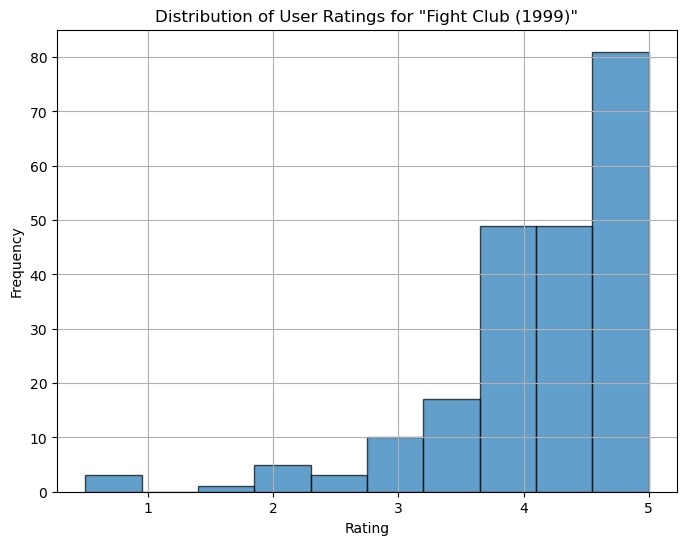

In [23]:


fight_club_movieId = movies.loc[movies['title'] == "Fight Club (1999)", 'movieId'].values[0]


fight_club_ratings = ratings.loc[ratings['movieId'] == fight_club_movieId, 'rating']


plt.figure(figsize=(8, 6))
plt.hist(fight_club_ratings, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [24]:

ratings_grouped = ratings.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()


movies_with_ratings = pd.merge(movies, ratings_grouped, on='movieId', how='inner')


filtered_movies = movies_with_ratings[movies_with_ratings['rating_count'] > 50]


print(filtered_movies.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
5                        Action|Crime|Thriller           102     3.946078  
6                               Comedy|Romance            54     3.185185  


In [26]:
a = pd.DataFrame(filtered_movies)

In [28]:
a

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [63]:
file = a.to_csv('New')

In [25]:
most_popular_movie = filtered_movies.loc[filtered_movies['rating_mean'].idxmax()]


print(f"The most popular movie based on average user ratings is '{most_popular_movie['title']}' "
      f"with an average rating of {most_popular_movie['rating_mean']:.2f} from {most_popular_movie['rating_count']} ratings.")

The most popular movie based on average user ratings is 'Shawshank Redemption, The (1994)' with an average rating of 4.43 from 317 ratings.


In [29]:

top_5_movies_by_ratings = filtered_movies.sort_values(by='rating_count', ascending=False).head(5)


print("Top 5 popular movies based on the number of user ratings:")
print(top_5_movies_by_ratings[['title', 'rating_count', 'rating_mean']])


Top 5 popular movies based on the number of user ratings:
                                 title  rating_count  rating_mean
314                Forrest Gump (1994)           329     4.164134
277   Shawshank Redemption, The (1994)           317     4.429022
257                Pulp Fiction (1994)           307     4.197068
510   Silence of the Lambs, The (1991)           279     4.161290
1938                Matrix, The (1999)           278     4.192446


In [30]:

sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]


sci_fi_sorted = sci_fi_movies.sort_values(by='rating_count', ascending=False)


third_most_popular_sci_fi = sci_fi_sorted.iloc[2]  # .iloc[2] gets the third row


print(f"The third most popular Sci-Fi movie based on the number of user ratings is '{third_most_popular_sci_fi['title']}' "
      f"with {third_most_popular_sci_fi['rating_count']} user ratings.")


The third most popular Sci-Fi movie based on the number of user ratings is 'Jurassic Park (1993)' with 238 user ratings.


In [31]:
links = pd.read_csv(r'C:\Users\monik\OneDrive\Desktop\Hackathon\movie_data\links.csv')
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [32]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/ratings"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('div', class_='sc-40b53d-3 fNhmCO')
    return imdb_rating.text if imdb_rating  else   np.nan   

In [33]:

# Step 2: Merge on 'movieId', but only include the 'imdbId' column from links_df
merged_df = pd.merge(a, links[['movieId', 'imdbId']], on='movieId',how= 'left')

In [34]:
merged_df

,movieId,title,genres,rating_count,rating_mean,imdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319
...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381


In [35]:
merged_df["imdbId_rating"]=merged_df["imdbId"].apply(scrapper)

In [36]:
max_rating_row = merged_df.loc[merged_df["imdbId_rating"].idxmax()]

print(max_rating_row)

movieId                              4995
title            Beautiful Mind, A (2001)
genres                      Drama|Romance
rating_count                          123
rating_mean                           4.0
imdbId                             268978
imdbId_rating                        998K
Name: 332, dtype: object


In [37]:
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi', case=False, na=False)]

print(sci_fi_movies)

max_rating_row_sci_fi = sci_fi_movies.loc[sci_fi_movies["imdbId_rating"].idxmax()]

print(max_rating_row_sci_fi)

     movieId                                      title  \
12        32  Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
30       160                               Congo (1995)   
35       172                     Johnny Mnemonic (1995)   
36       173                         Judge Dredd (1995)   
38       208                          Waterworld (1995)   
..       ...                                        ...   
427    89745                       Avengers, The (2012)   
428    91500                    The Hunger Games (2012)   
433   109487                        Interstellar (2014)   
434   112852             Guardians of the Galaxy (2014)   
435   122904                            Deadpool (2016)   

                                     genres  rating_count  rating_mean  \
12                  Mystery|Sci-Fi|Thriller           177     3.983051   
30          Action|Adventure|Mystery|Sci-Fi            57     2.877193   
35                   Action|Sci-Fi|Thriller            53     2.67924